In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d

In [60]:
def smooth(scalars, weight):
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

def fill_in_nan(arr):
    nan_bool = ~np.isnan(arr)
    not_nan_ids = nan_bool.ravel().nonzero()[0]
    not_nan_vals = arr[nan_bool]
    nan_bool_ids  = np.isnan(arr).ravel().nonzero()[0]
    # Replacing nan values
    arr_copy = arr.copy()
    arr_copy.loc[~nan_bool] = np.interp(nan_bool_ids, not_nan_ids, not_nan_vals)
    arr = arr_copy
    return arr

def mean_ep_len(path_dict:dict):
    for k in path_dict.keys():
        df = pd.read_csv(path_dict.get(k)[0])
        x = path_dict.get(k)[2]*np.arange(0, len(df))

        plt.figure(figsize=(10, 3), dpi=180)
        # plot 1
        plt.subplot(1, 2, 1)

        y = df['rollout/ep_len_mean']
        y = fill_in_nan(y)
        err = (y.max() - y) / 2
        y += np.random.normal(0, err / 10, y.size)
        upper = gaussian_filter1d(y + err, sigma=3)
        lower = gaussian_filter1d(y - err, sigma=3)
        smoothed_y = smooth(list(y), path_dict.get(k)[1])
        plt.plot(x, smoothed_y, color='dodgerblue')
        plt.fill_between(x, upper, lower, color='crimson', alpha=0.2)

        plt.title(f'Mean episode length')
        plt.xlabel('Iterations')
        plt.tick_params(axis='x', labelrotation=45)
        # plot 2
        plt.subplot(1, 2, 2)

        y = df['rollout/ep_rew_mean']
        y = fill_in_nan(y)
        err = (y.max() - y) / 2
        y += np.random.normal(0, err / 10, y.size)
        upper = gaussian_filter1d(y + err, sigma=3)
        lower = gaussian_filter1d(y - err, sigma=3)
        smoothed_y = smooth(list(y), path_dict.get(k)[1])
        plt.plot(x, smoothed_y, color='dodgerblue')
        plt.fill_between(x, upper, lower, color='crimson', alpha=0.2)

        plt.title(f'Mean episode reward')
        plt.xlabel('Iterations')
        plt.tick_params(axis='x', labelrotation=45)

        plt.suptitle(f'Results of {k}', y=1.05, fontsize=14)
        plt.savefig(f'Results of {k}.png', bbox_inches='tight')
        plt.show()

In [61]:
progress_paths = {"Attempt 1":['final_models/attempt1/attempt1_progress.csv',0.6,4096],
                  "Attempt 2":['final_models/attempt2/attempt2_progress.csv',0.8,4096],
                  "Attempt 3":['final_models/attempt3/attempt3_progress.csv',0.3,4096],
                  "Attempt 4":['final_models/attempt4/attempt4_progress.csv',0.9,4096],
                  "Attempt 5":['final_models/attempt5/attempt5_progress.csv',0.9,512]
                  }

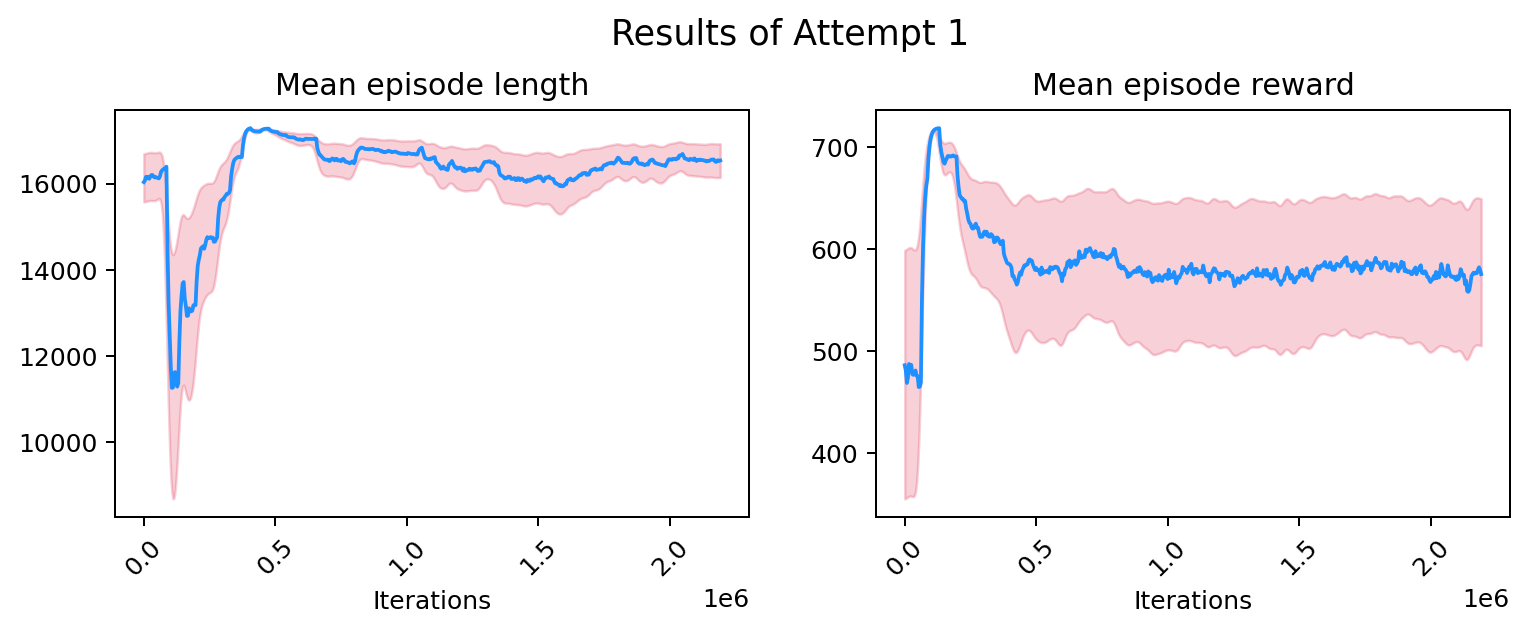

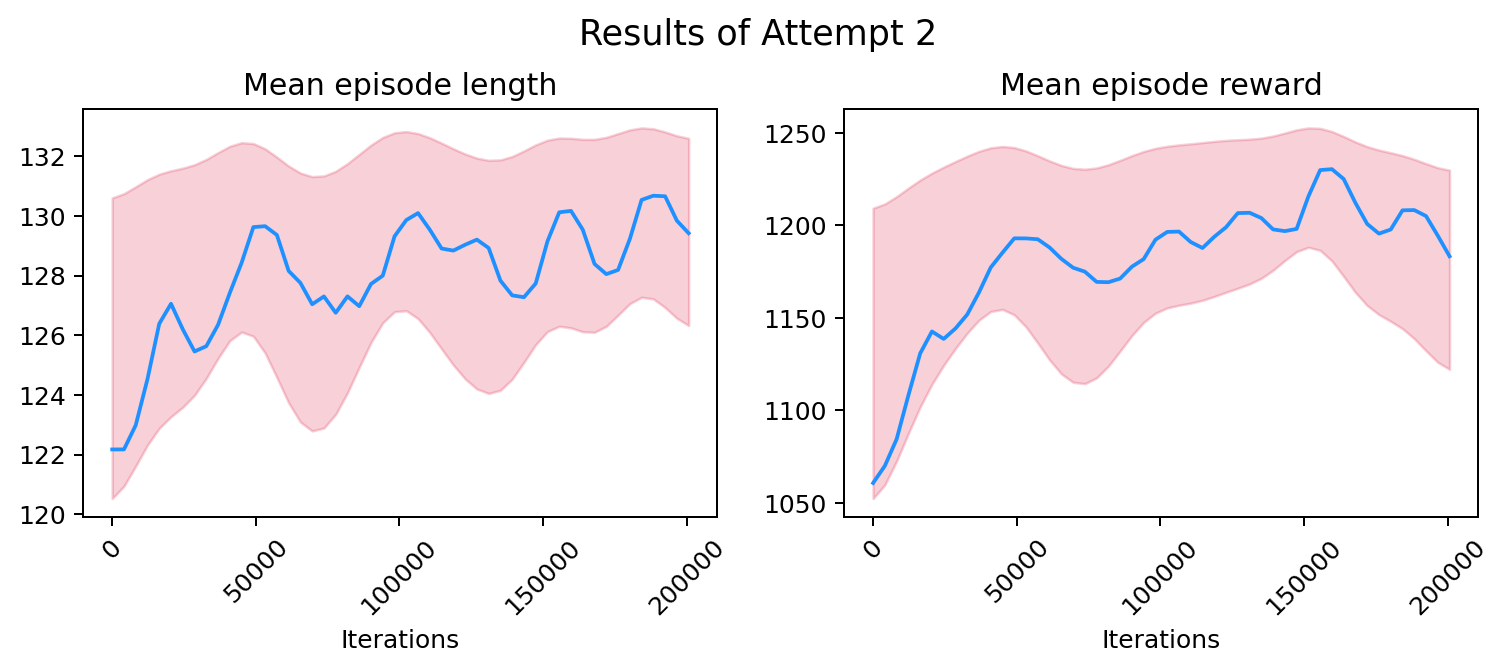

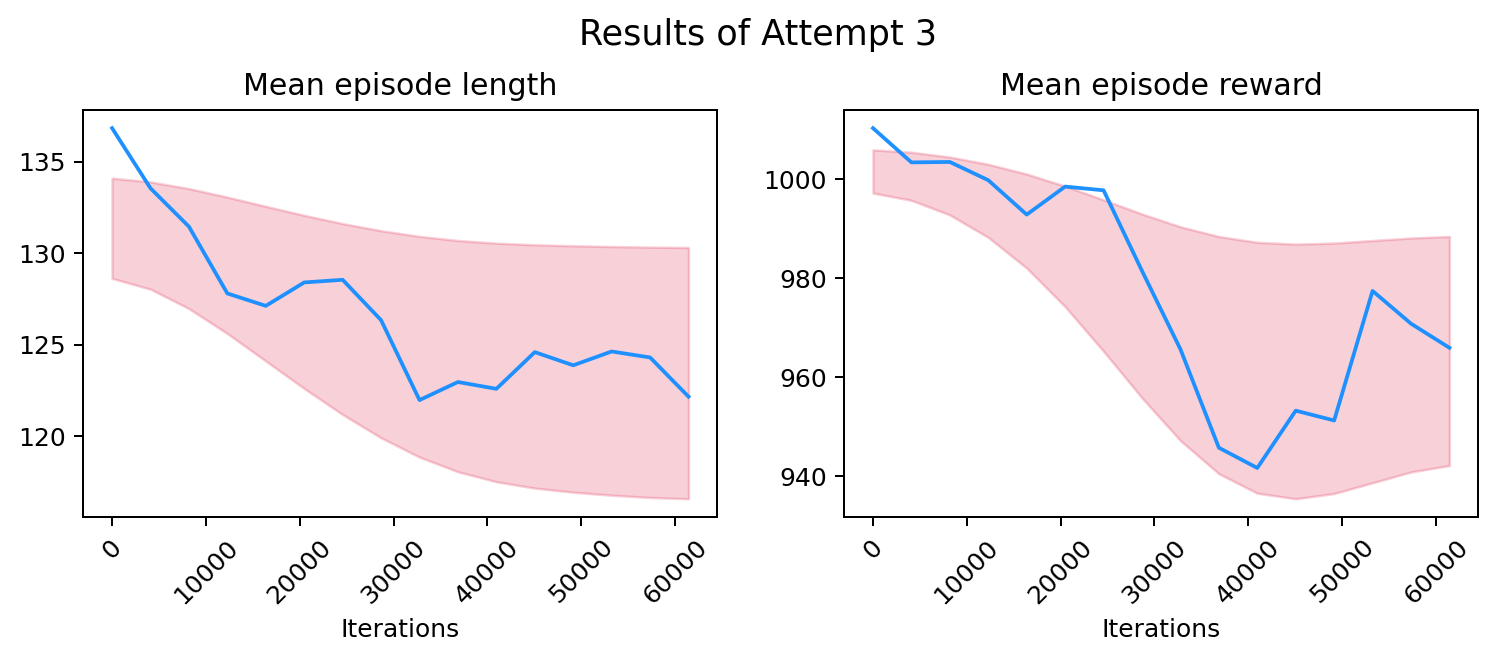

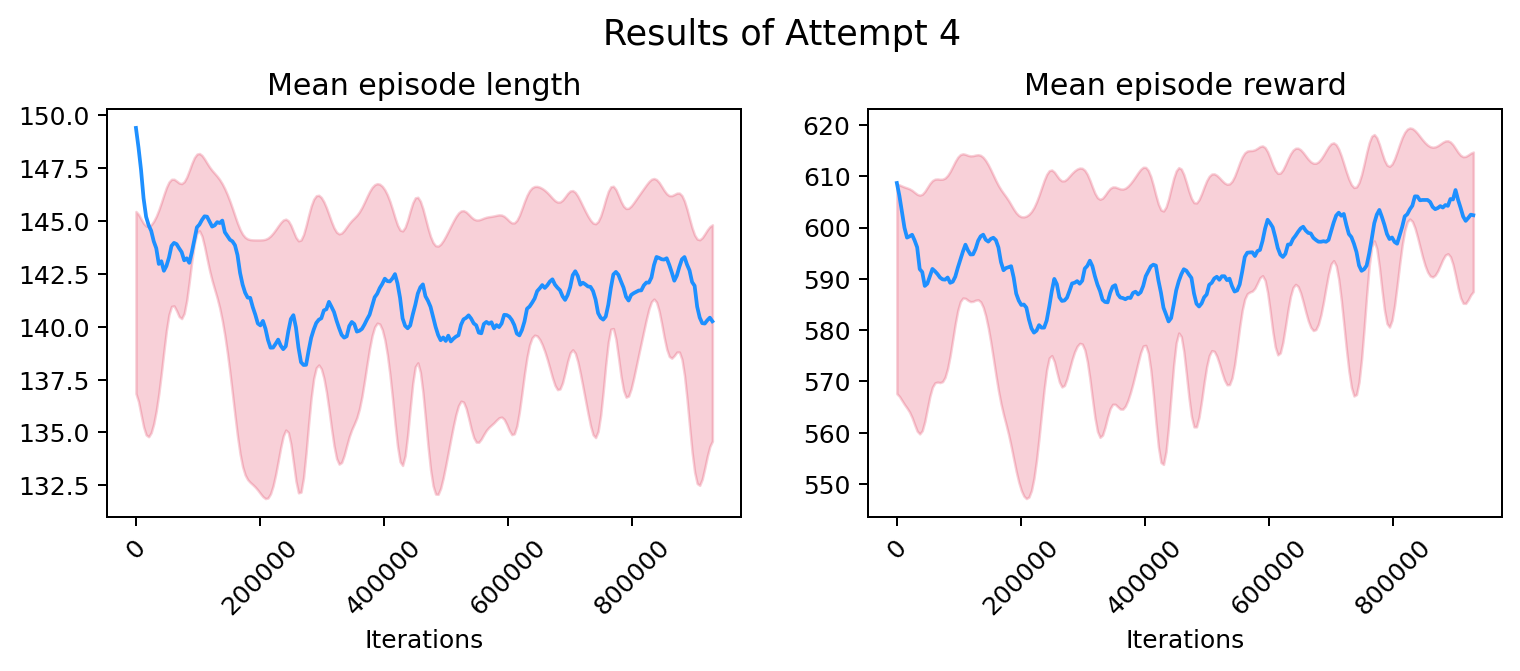

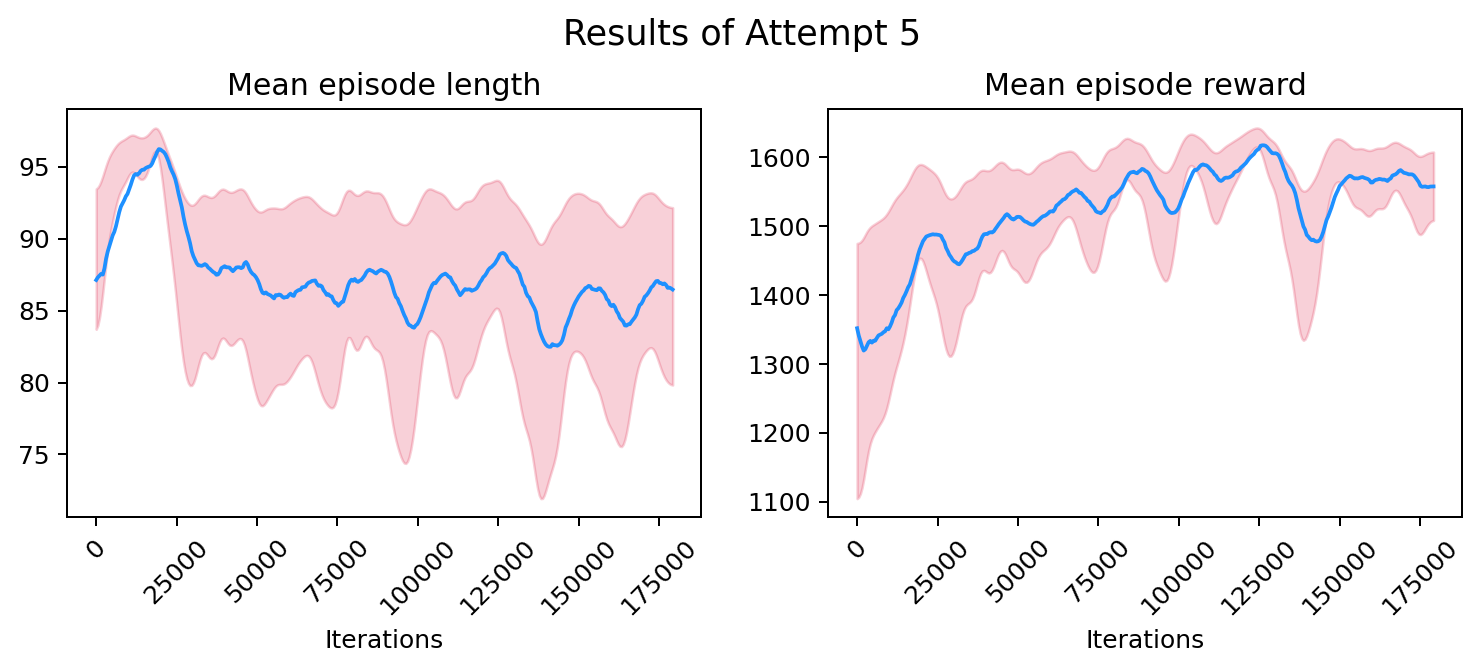

In [62]:
mean_ep_len(progress_paths)